In [35]:
import pandas as pd
import numpy as np

from datetime import datetime

%matplotlib inline
pd.set_option('display.max_rows', 500)

![CRISP_DM](../reports/figures/CRISP_DM.png)

# Data Preparation
* focus is always to understand the final data structure
* support each step by visual analytics

# Johns Hopkins GITHUB csv data

In [36]:
data_path='../data/raw/COVID-19/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv'
pd_raw_corona_data=pd.read_csv(data_path)
pd_raw_corona_data.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,6/13/22,6/14/22,6/15/22,6/16/22,6/17/22,6/18/22,6/19/22,6/20/22,6/21/22,6/22/22
0,NaN,Afghanistan,33.93911,67.709953,0,0,0,0,0,0,...,181120,181178,181236,181465,181534,181574,181666,181725,181808,181912
1,NaN,Albania,41.15330,20.168300,0,0,0,0,0,0,...,276731,276821,276821,276821,277141,277141,277409,277444,277663,277940
2,NaN,Algeria,28.03390,1.659600,0,0,0,0,0,0,...,265937,265943,265952,265964,265968,265971,265975,265985,265993,266006
3,NaN,Andorra,42.50630,1.521800,0,0,0,0,0,0,...,43224,43224,43449,43449,43449,43449,43449,43449,43449,43774
4,NaN,Angola,-11.20270,17.873900,0,0,0,0,0,0,...,99761,99761,99761,99761,99761,99761,99761,99761,99761,99761


In [37]:
time_idx=pd_raw_corona_data.columns[4:]
df_plot = pd.DataFrame({
    'date':time_idx})
df_plot.head()

,date
0,1/22/20
1,1/23/20
2,1/24/20
3,1/25/20
4,1/26/20


In [38]:
pd_raw_corona_data['Country/Region']

0                           Afghanistan
1                               Albania
2                               Algeria
3                               Andorra
4                                Angola
5                            Antarctica
6                   Antigua and Barbuda
7                             Argentina
8                               Armenia
9                             Australia
10                            Australia
11                            Australia
12                            Australia
13                            Australia
14                            Australia
15                            Australia
16                            Australia
17                              Austria
18                           Azerbaijan
19                              Bahamas
20                              Bahrain
21                           Bangladesh
22                             Barbados
23                              Belarus
24                              Belgium


<AxesSubplot:xlabel='date'>

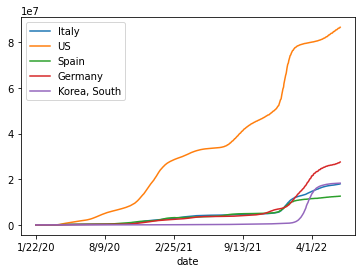

In [39]:

country_list=['Italy',
              'US',
              'Spain',
              'Germany',
              'Korea, South',
             ] 
for each in country_list:
    df_plot[each]=np.array(pd_raw_corona_data[pd_raw_corona_data['Country/Region']==each].iloc[:,4::].sum(axis=0))
    %matplotlib inline
df_plot.set_index('date').plot()

# DATA TYPE DATE

In [40]:
 # conversion to datetime due to pandas requirement
time_idx=[datetime.strptime( each,"%m/%d/%y") for each in df_plot.date]
# conversion back to date ISO norm (str)
time_str=[each.strftime('%Y-%m-%d') for each in time_idx] 
df_plot['date']=time_idx
type(df_plot['date'][0])
df_plot.head()


,date,Italy,US,Spain,Germany,"Korea, South"
0,2020-01-22,0,1,0,0,1
1,2020-01-23,0,1,0,0,1
2,2020-01-24,0,2,0,0,2
3,2020-01-25,0,2,0,0,2
4,2020-01-26,0,5,0,0,3


In [41]:
# storing data model to processed file location
df_plot.to_csv('../data/processed/COVID_small_flat_table.csv',sep=';',index=False)

# Relational data model - defining a primary key
In the relational model of databases, a primary key is a specific choice of a minimal set of attributes (columns) that uniquely specify a tuple (row) in a relation (table) (source: wiki)
A primary key’s main features are:
* It must contain a unique value for each row of data.
* It cannot contain null values.

In [42]:
data_path='../data/raw/COVID-19/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv'
pd_raw_corona_data= pd.read_csv(data_path)
pd_raw_corona_data.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,6/13/22,6/14/22,6/15/22,6/16/22,6/17/22,6/18/22,6/19/22,6/20/22,6/21/22,6/22/22
0,NaN,Afghanistan,33.93911,67.709953,0,0,0,0,0,0,...,181120,181178,181236,181465,181534,181574,181666,181725,181808,181912
1,NaN,Albania,41.15330,20.168300,0,0,0,0,0,0,...,276731,276821,276821,276821,277141,277141,277409,277444,277663,277940
2,NaN,Algeria,28.03390,1.659600,0,0,0,0,0,0,...,265937,265943,265952,265964,265968,265971,265975,265985,265993,266006
3,NaN,Andorra,42.50630,1.521800,0,0,0,0,0,0,...,43224,43224,43449,43449,43449,43449,43449,43449,43449,43774
4,NaN,Angola,-11.20270,17.873900,0,0,0,0,0,0,...,99761,99761,99761,99761,99761,99761,99761,99761,99761,99761


In [43]:
#changing the names of the columns and droppping columns namely lat and long as they are geographical concepts and not needed.
pd_data_base=pd_raw_corona_data.rename(columns={'Country/Region':'country',
                      'Province/State':'state'})
pd_data_base['state']=pd_data_base['state'].fillna('no')
pd_data_base=pd_data_base.drop(['Lat','Long'],axis=1)
pd_data_base.head()

,state,country,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,...,6/13/22,6/14/22,6/15/22,6/16/22,6/17/22,6/18/22,6/19/22,6/20/22,6/21/22,6/22/22
0,no,Afghanistan,0,0,0,0,0,0,0,0,...,181120,181178,181236,181465,181534,181574,181666,181725,181808,181912
1,no,Albania,0,0,0,0,0,0,0,0,...,276731,276821,276821,276821,277141,277141,277409,277444,277663,277940
2,no,Algeria,0,0,0,0,0,0,0,0,...,265937,265943,265952,265964,265968,265971,265975,265985,265993,266006
3,no,Andorra,0,0,0,0,0,0,0,0,...,43224,43224,43449,43449,43449,43449,43449,43449,43449,43774
4,no,Angola,0,0,0,0,0,0,0,0,...,99761,99761,99761,99761,99761,99761,99761,99761,99761,99761


In [44]:
check_pd = pd_data_base.set_index(['state','country']).T

#resigning for stacking
double_check_pd=check_pd.stack(level=[0,1]).reset_index()



In [45]:
#resigning for renaming the columns
pd_relational_model = double_check_pd.rename(columns={'level_0':'date',
                                0:'confirmed'},
)


In [46]:
pd_relational_model.head(5)

,date,state,country,confirmed
0,1/22/20,Alberta,Canada,0.0
1,1/22/20,Anguilla,United Kingdom,0.0
2,1/22/20,Anhui,China,1.0
3,1/22/20,Aruba,Netherlands,0.0
4,1/22/20,Australian Capital Territory,Australia,0.0


In [47]:
#casting entire directly into datetime object
pd_relational_model['date']=pd_relational_model.date.astype('datetime64[ns]')


In [48]:
pd_relational_model.confirmed=pd_relational_model.confirmed.astype(int)

In [49]:
# Storing the data
pd_relational_model.to_csv('../data/processed/COVID_relational_confirmed.csv',sep=';',index=False)

In [50]:
print(pd_relational_model[pd_relational_model['country']=='China'].tail())

             date     state country  confirmed
251449 2022-06-22     Tibet   China          1
251451 2022-06-22   Unknown   China     662331
251455 2022-06-22  Xinjiang   China       1008
251457 2022-06-22    Yunnan   China       2164
251458 2022-06-22  Zhejiang   China       3150


In [60]:
print(pd_relational_model[pd_relational_model['country']=='US'].tail())

             date state country  confirmed
250500 2022-06-18    no      US   86230982
250785 2022-06-19    no      US   86246101
251070 2022-06-20    no      US   86297081
251355 2022-06-21    no      US   86452232
251640 2022-06-22    no      US   86636306


# Attention due to the new structure of the Johns Hopkins data set of US

In [51]:
data_path='../data/raw/COVID-19/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_US.csv'
pd_raw_corona_data=pd.read_csv(data_path)
pd_raw_corona_data.head()

,UID,iso2,iso3,code3,FIPS,Admin2,Province_State,Country_Region,Lat,Long_,...,6/13/22,6/14/22,6/15/22,6/16/22,6/17/22,6/18/22,6/19/22,6/20/22,6/21/22,6/22/22
0,84001001,US,USA,840,1001.0,Autauga,Alabama,US,32.539527,-86.644082,...,16134,16158,16174,16193,16211,16211,16211,16279,16313,16330
1,84001003,US,USA,840,1003.0,Baldwin,Alabama,US,30.727750,-87.722071,...,57366,57453,57554,57637,57726,57726,57726,57887,58009,58169
2,84001005,US,USA,840,1005.0,Barbour,Alabama,US,31.868263,-85.387129,...,5757,5764,5769,5771,5782,5782,5782,5795,5813,5818
3,84001007,US,USA,840,1007.0,Bibb,Alabama,US,32.996421,-87.125115,...,6565,6573,6583,6596,6611,6611,6611,6621,6630,6648
4,84001009,US,USA,840,1009.0,Blount,Alabama,US,33.982109,-86.567906,...,15150,15174,15177,15188,15207,15207,15207,15222,15246,15249


In [52]:
pd_raw_corona_data=pd_raw_corona_data.drop(['UID', 'iso2', 'iso3', 'code3', 'Country_Region','FIPS', 'Admin2',  'Lat', 'Long_', 'Combined_Key'],axis=1)
pd_data_new_US=pd_raw_corona_data.rename(columns={'Province_State':'state'}).copy()

In [53]:
pd_relational_model_US = pd_data_new_US.set_index(['state']) \
                                .T                              \
                                .stack()             \
                                .reset_index()                  \
                                .rename(columns={'level_0':'date',
                                                   0:'confirmed'},
                                                  )
pd_relational_model_US['country']='US'
pd_relational_model_US['date']=[datetime.strptime( each,"%m/%d/%y") for each in pd_relational_model_US.date] # convert to datetime
pd_relational_model_US.head()

,date,state,confirmed,country
0,2020-01-22,Alabama,0,US
1,2020-01-22,Alabama,0,US
2,2020-01-22,Alabama,0,US
3,2020-01-22,Alabama,0,US
4,2020-01-22,Alabama,0,US


In [54]:
pd_relational_model_each=pd_relational_model[pd_relational_model['country']!='US'].reset_index(drop=True)

In [55]:
pd_relational_model_each=pd.concat([pd_relational_model_each,pd_relational_model_US],ignore_index=True)

In [56]:
pd_relational_model_each.to_csv('../data/processed/20200424_COVID_relational_confirmed.csv',sep=';',index=False)

In [57]:
print(pd_relational_model_each[pd_relational_model_each['country']=='US'])

              date    state country  confirmed
250772  2020-01-22  Alabama      US          0
250773  2020-01-22  Alabama      US          0
250774  2020-01-22  Alabama      US          0
250775  2020-01-22  Alabama      US          0
250776  2020-01-22  Alabama      US          0
...            ...      ...     ...        ...
3201753 2022-06-22  Wyoming      US      10699
3201754 2022-06-22  Wyoming      US       5784
3201755 2022-06-22  Wyoming      US          0
3201756 2022-06-22  Wyoming      US       2490
3201757 2022-06-22  Wyoming      US       1641

[2950986 rows x 4 columns]


# Cross check US data

In [58]:
check_data_US=pd_relational_model_each[pd_relational_model_each['country']=='US']

In [59]:
check_data_US[['date','country','confirmed']].groupby(['date','country']).sum()

,,confirmed
date,country,
2020-01-22,US,1
2020-01-23,US,1
2020-01-24,US,2
2020-01-25,US,2
2020-01-26,US,5
...,...,...
2022-06-18,US,86230982
2022-06-19,US,86246101
2022-06-20,US,86297081
